# Proyek Analisis Data: Air Quality Index (PM2.5)
- **Nama:** Rava Maulana
- **Email:** ravamaulana14@gmail.com
- **ID Dicoding:** rma1403

## Menentukan Pertanyaan Bisnis

Pertanyaan bisnis yang dibuat mengacu pada framework SMART untuk menghasilkan pertanyaan yang baik dan efektif. Pertanyaan
yang efektif akan menghasilkan insight menarik dari dataset yang dianalisis. Berikut merupakan dua pertanyaan yang diajukan
untuk membantu menganalisis data.

1. **Apakah terdapat pola harian tingkat PM2.5 pada setiap stasiun?**  
  Pertanyaan ini bertujuan untuk mengeksplorasi pola atau siklus yang mungkin muncul terhadap tingkat PM2.5. Dengan diketahuinya
  pola harian pada tingkat PM2.5 untuk setiap stasiun, perencanaan untuk meningkatkan kualitas udara dapat difokuskan pada jam-jam
  dengan tingkat PM2.5 tertinggi. Jika ditemukan pola yang lebih general antar-statsiun pengukuran, upaya peningkatan kualitas
  udara dapat dilakukan dengan skala yang lebih masif.

2. **Apa polutan dengan tingkat variasi tertinggi pada stasiun dengan tingkat PM2.5 tertinggi?**  
  Pertanyaan ini bertujuan untuk menemukan polutan dengan variasi tertinggi pada stasiun dengan tingkat PM2.5 tertinggi. Polutan dengan
  tingkat variasi tertinggi menunjukkan bahwa polutan tersebut sering berfluktuasi dari waktu ke waktu. Polutan yang sering
  berfluktuasi memiliki resiko yang tinggi karena perubahannya tidak dapat diprediksi. Stasiun dengan tingkat PM2.5 tertinggi
  digunakan karena tingginya tingkat PM2.5 menunjukkan buruknya kualitas udara pada stasiun tersebut. Polutan yang paling tidak
  dapat diprediksi pada stasiun dengan kualitas udara terburuk harus dijadikan fokus utama dalam upaya peningkatan kualitas udara
  untuk menurunkan tingkat polutan tersebut.

## Import Semua Packages/Library yang Digunakan

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATA_FOLDER = "PRSA_Data_20130301-20170228"

## Data Wrangling

### Gathering Data

Proses pengumpulan data dilakukan dengan menggabungkan beberapa file csv menjadi satu DataFrame. Secara keseluruhan, terdapat 12
file csv yang berisi hasil pengukuran kadar zat di udara pada setiap stasiun pengukuran.

In [3]:
files = os.listdir(DATA_FOLDER)
dataset = pd.read_csv(os.path.join(DATA_FOLDER, files[0]))
for file in files[1:]:
    temp_df = pd.read_csv(os.path.join(DATA_FOLDER, file))
    dataset = pd.concat([dataset, temp_df], ignore_index=True)

Dilakukan inspeksi 5 data pertama pada dataset untuk melihat kolom-kolom yang ada serta tipe data yang ada pada setiap kolom.

In [4]:
dataset.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Dilakukan inspeksi terhadap dimensi dataset untuk mengetahui jumlah kolom serta jumlah instance data pada dataset.

In [5]:
dataset.shape

(420768, 18)

Dilakukan penambahan kolom "datetime" untuk menggabungkan seluruh komponen waktu pada dataset. Hal ini dilakukan untuk
mempermudah pemrosesan data yang merupakan data timeseries.

In [6]:
dataset["datetime"] = pd.to_datetime(dataset[["year", "month", "day", "hour"]])
dataset.drop(["year", "month", "day", "hour"], axis=1, inplace=True)

In [7]:
dataset.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


### Assessing Data

Dilakukan inspeksi terhadap nilai null untuk setiap kolom pada dataset. Ditemukan bahwa kolom yang memiliki data null terbanyak adalah
"CO" dengan data null sebanyak 20.701 instance. Berdasarkan analisis ini juga ditemukan bahwa sebagian besar (15 dari 18) kolom memiliki
data null sehingga perlu dilakukan cleaning nilai null pada dataset. 

In [8]:
dataset.isnull().sum()

No              0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

Dilakukan inspeksi terhadap duplikasi data pada dataset. Berdasarkan inspeksi, tidak ditemukan data duplikat pada dataset
yang berarti tidak diperlukannya cleaning terhadap data duplikat.

In [9]:
dataset.duplicated().sum()

0

Dilakukan inspeksi terhadap jumlah outlier untuk setiap kolom pada dataset. Ditemukan bahwa 8 dari 12 kolom memiliki data
outlier. Kolom dengan data outlier terbanyak adalah "SO2" dengan jumlah outlier sebesar 8.64% atau sebanyak 35.566 data dari
total 411.747 data.

In [10]:
for column in dataset.select_dtypes(include=np.number):
    sample = dataset[column].dropna()
    
    q25, q75 = np.percentile(sample, 25), np.percentile(sample,75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in sample if x > maximum or x < minimum]
    print(f"{column}: {len(outliers)} outliers of {len(sample)} samples ({(len(outliers)/len(sample)*100):.2f}%)")

No: 0 outliers of 420768 samples (0.00%)
PM2.5: 19142 outliers of 412029 samples (4.65%)
PM10: 14658 outliers of 414319 samples (3.54%)
SO2: 35566 outliers of 411747 samples (8.64%)
NO2: 7021 outliers of 408652 samples (1.72%)
CO: 28054 outliers of 400067 samples (7.01%)
O3: 16599 outliers of 407491 samples (4.07%)
TEMP: 0 outliers of 420370 samples (0.00%)
PRES: 0 outliers of 420375 samples (0.00%)
DEWP: 0 outliers of 420365 samples (0.00%)
RAIN: 16520 outliers of 420378 samples (3.93%)
WSPM: 23079 outliers of 420450 samples (5.49%)


### Cleaning Data

Berikutnya, dilakukan cleaning untuk nilai null pada dataset. Metode cleaning yang dilakukan dibedakan berdasarkan tipe data dari
kolom. Untuk kolom dengan tipe data numerik dilakukan cleaning nilai null dengan menggunakan nilai median. Nilai median lebih dipilih
daripada nilai mean karena sebagian besar kolom memiliki jumlah outlier yang cukup banyak. Sementara itu, dilakukan cleaning nilai
null menggunakan modus untuk kolom dengan tipe data kategorikal/non-numerik.

In [11]:
for column in dataset.select_dtypes(include=np.number):
    dataset[column] = dataset[column].fillna(value=dataset[column].median())

for column in dataset.select_dtypes(exclude=np.number):
    dataset[column] = dataset[column].fillna(value=dataset[column].mode()[0])

dataset.isnull().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

## Exploratory Data Analysis (EDA)

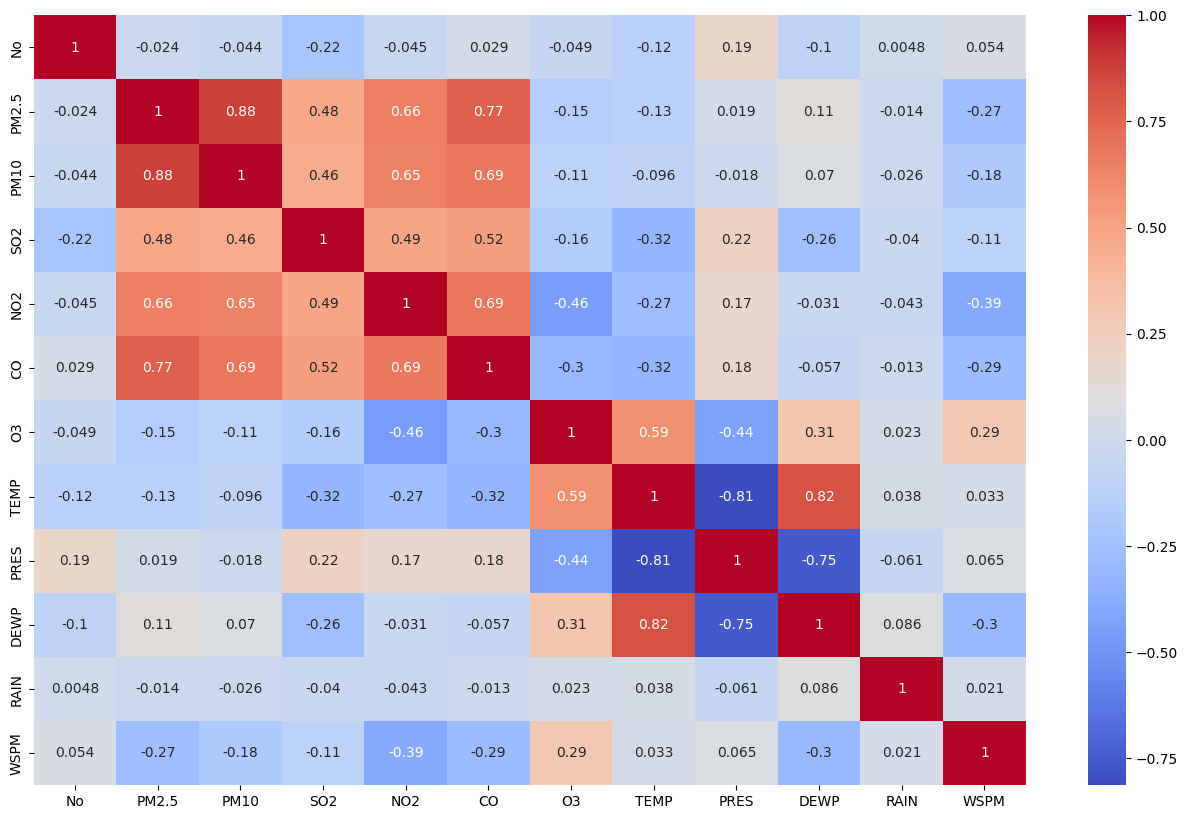

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

Analisis korelasi dilakukan untuk melihat hubungan antara sebuah fitur dengan fitur lainnya. Terlihat **korelasi tertinggi dimiliki oleh fitur 
"PM2.5" dan "PM10"**, sementara kedua tertinggi dimiliki oleh fitur "DEWP" dan "TEMP". Korelasi ini akan berguna ketika ingin dilakukan prediksi
untuk suatu fitur, contohnya dalam prediksi tingkat PM2.5, tingkat PM10 akan sangat berpengaruh.

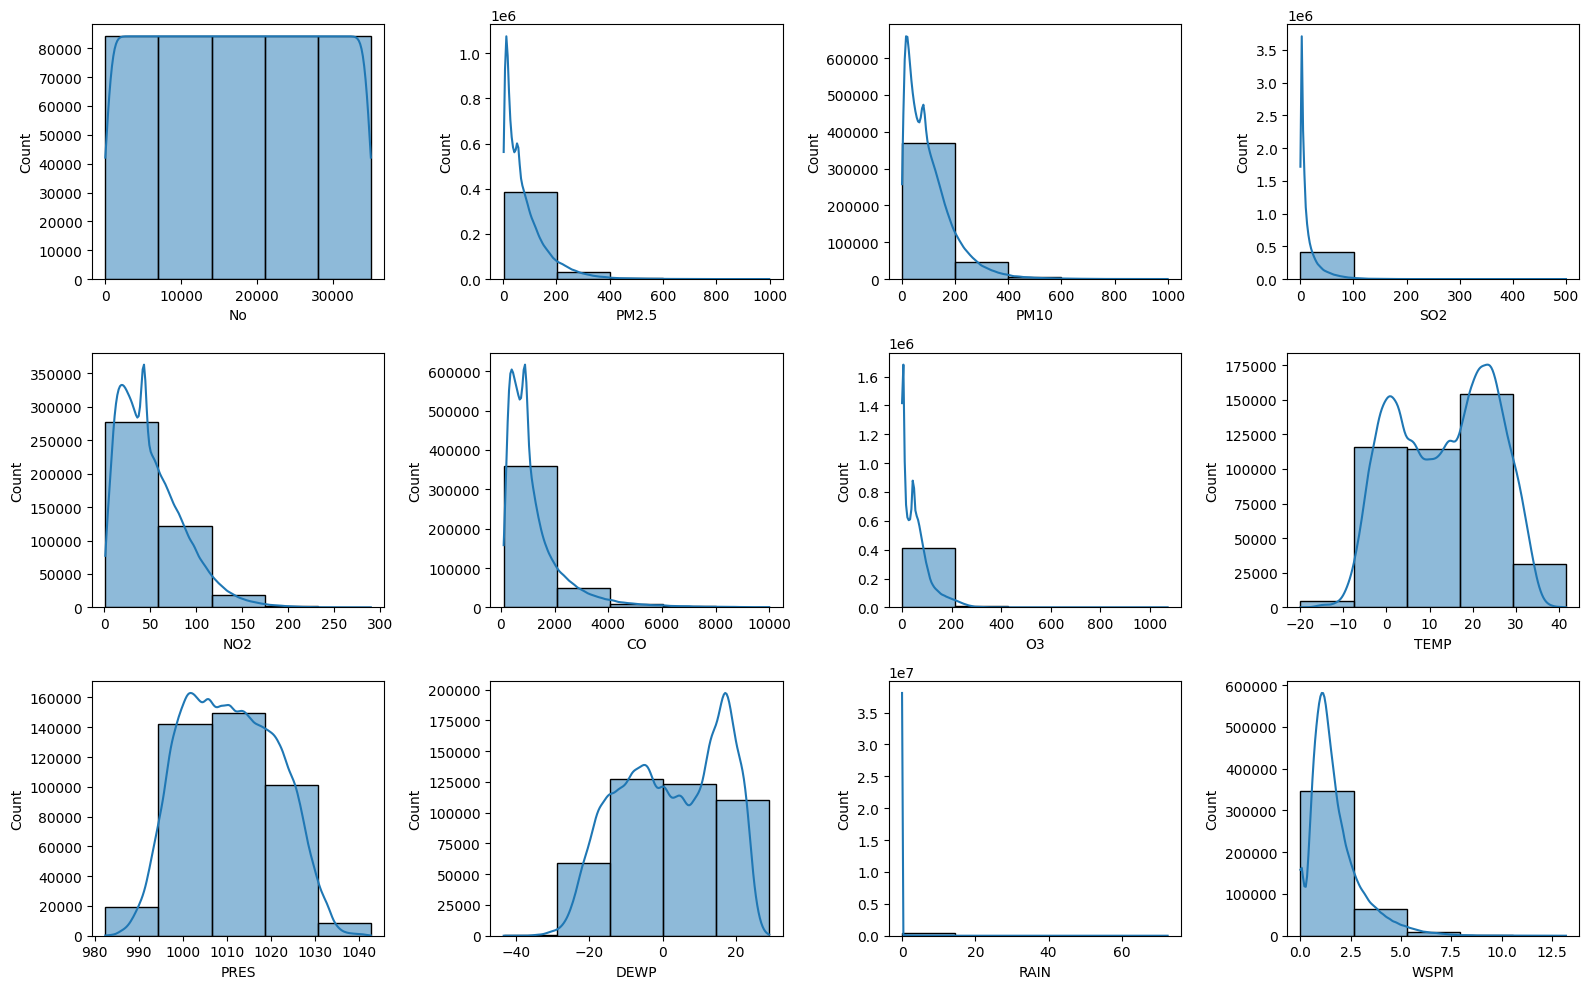

In [13]:
numeric = dataset.select_dtypes(include="number").columns.tolist()

plt.figure(figsize=(16,10))
for i, column in enumerate(numeric, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(dataset[column], bins=5, kde=True)
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Analisis terhadap distribusi data dilakukan untuk melihat persebaran, variabilitas, dan kesimetrisan setiap fitur. Beberapa fitur seperti
"TEMP", "PRES", dan "DEWP" memiliki distribusi yang relatif simetris. Sementara itu, fitur-fitur lainnya memiliki distribusi yang tidak
simetris dan cenderung bersifat right-skewed.

## Visualization & Explanatory Analysis

### Apakah terdapat pola harian tingkat PM2.5 pada setiap stasiun?

In [14]:
def get_station_date_range(start_date, end_date, station):
    temp_df = dataset.loc[(dataset["datetime"] >= start_date) & (dataset["datetime"] <= end_date) & (dataset["station"] == station)].copy()
    temp_df["hour"] = temp_df["datetime"].dt.hour
    return temp_df

def plot_pm25(start_date, end_date):
    gucheng_visual_df = get_station_date_range(start_date, end_date, "Gucheng")
    huairou_visual_df = get_station_date_range(start_date, end_date, "Huairou")

    visual_df = pd.concat([gucheng_visual_df, huairou_visual_df], ignore_index=True)
    
    sns.lineplot(data=visual_df, x="hour", y="PM2.5", hue="station")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.xticks(range(0, 24, 2))
    plt.show()

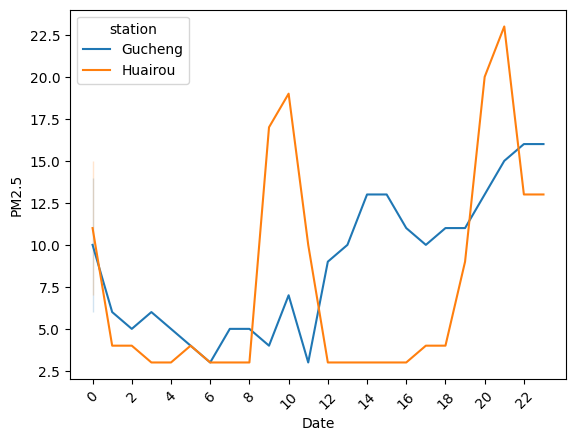

In [15]:
plot_pm25("2013-03-01 00:00:00", "2013-03-02 00:00:00")

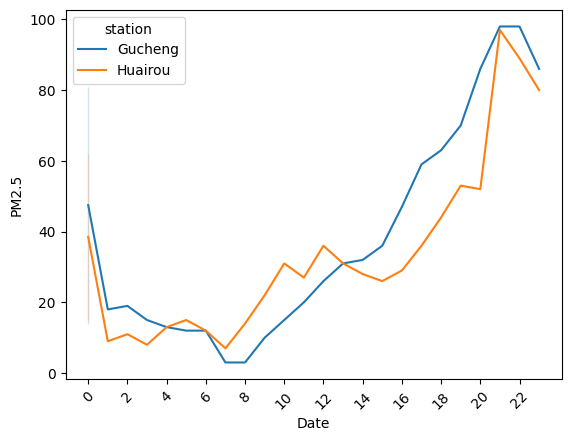

In [16]:
plot_pm25("2013-03-02 00:00:00", "2013-03-03 00:00:00")

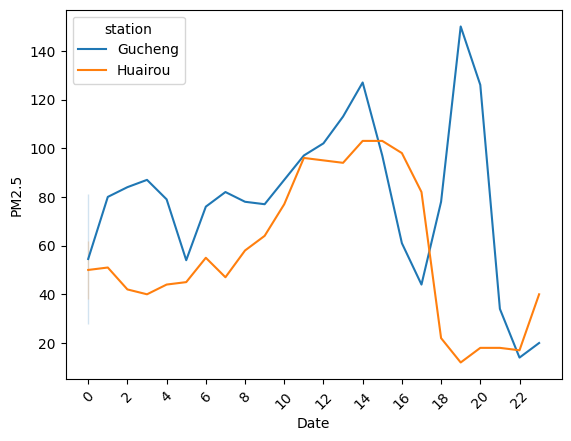

In [17]:
plot_pm25("2013-03-03 00:00:00", "2013-03-04 00:00:00")

Analisis dilakukan dengan **membandingkan hasil pengukuran tingkat PM2.5 pada dua stasiun pengukuran**, Gucheng dan Huairou. Pemilihan kedua
stasiun dilakukan secara acak. Dilakukan plotting tingkat PM2.5 setiap jam dalam rentang waktu 24 jam. Plotting dilakukan pada data 3 hari
yang berurutan, yaitu tanggal 1 Maret 2013, 2 Maret 2013, dan 3 Maret 2013. Pemilihan tanggal dilakukan secara acak tetapi dipilih hari-hari
yang berdekatan untuk mengurangi kemungkinan faktor-faktor eksternal mempengaruhi pola harian tingkat PM2.5, seperti kejadian yang tak terduga
ataupun bencana alam.

Berdasarkan analisis, **tidak ditemukan pola berulang yang muncul harian pada data**. Dengan tidak adanya pola ini, dapat disimpulkan bahwa
tingkat PM2.5 yang muncul disebabkan oleh faktor yang lebih kompleks yang cenderung bersifat acak. Walaupun tidak ada pola harian berulang
yang muncul, terdapat dua insight yang dapat diambil.
1. **Tingkat PM2.5 antar stasiun cenderung memiliki tren yang sama**. Jika tingkat PM2.5 sedang mengalami kenaikan pada satu waktu untuk satu stasiun,
   tingkat PM2.5 pada stasiun lain juga akan cenderung mengalami kenaikan. Hal ini menunjukkan bahwa perubahan tingkat PM2.5 terjadi dalam cakupan
   geografis yang luas.

2. **Tingkat PM2.5 memiliki tren yang menaik dari waktu ke waktu**. Tren kenaikan ini terjadi pada seluruh stasiun pengukuran yang ada. Hal ini
   menunjukkan bahwa kualitas udara dari waktu ke waktu semakin buruk sehingga diperlukan upaya untuk menghentikan kenaikan tingkat PM2.5 ini.
   Upaya yang dibutuhkan harus mencakup lokasi geografis yang luas karena kenaikan tingkat PM2.5 terjadi pada seluruh stasiun pengukuran.

### Apa polutan dengan tingkat variasi tertinggi pada stasiun dengan tingkat PM2.5 tertinggi?

In [18]:
highest = dataset.groupby(by="station")["PM2.5"].mean().idxmax()
print(f"Station with the highest PM2.5: {highest}")

Station with the highest PM2.5: Dongsi


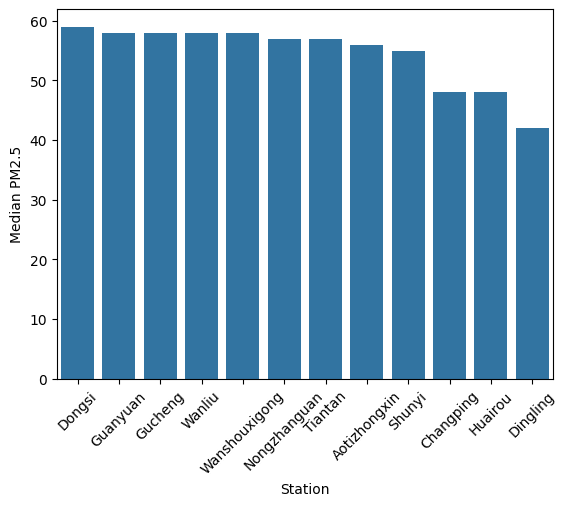

In [19]:
median_pm25 = dataset.groupby('station')['PM2.5'].median().sort_values(ascending=False).reset_index()

sns.barplot(data=median_pm25, x='station', y='PM2.5')
plt.xlabel('Station')
plt.ylabel('Median PM2.5')
plt.xticks(rotation=45)
plt.show()

Nilai median tingkat PM2.5 digunakan untuk menentukan stasiun dengan kualitas udara terburuk. Nilai median dipilih daripada nilai 
mean karena terdapat banyak outlier dan distribusi data yang sangat tidak simetris. Berdasarkan barplot, **stasiun dengan median 
tingkat PM2.5 tertinggi adalah Dongsi**. Stasiun ini kemudian dipilih untuk membandingkan tingkat variasi dari masing-masing polutan 
untuk menemukan polutan dengan tingkat variasi tertinggi.

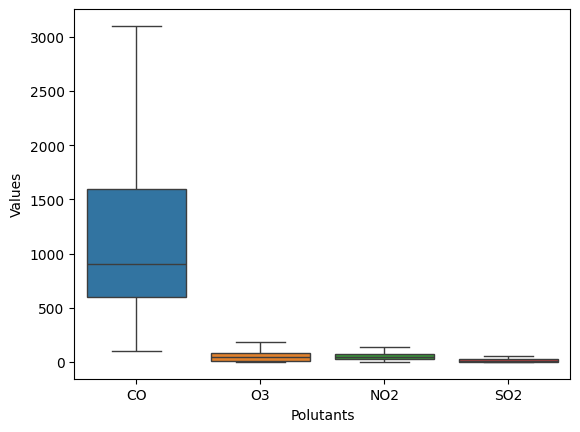

In [20]:
polutants = ["SO2", "NO2", "CO", "O3"]
station_df = dataset[dataset['station'] == 'Dongsi'].drop(columns='station')[polutants]
variances = station_df.var().sort_values(ascending=False)

sns.boxplot(data=station_df[variances.index], showfliers=False)
plt.xlabel('Polutants')
plt.ylabel('Values')
plt.show()

In [21]:
print(f"Variance of CO: {variances['CO']}")
print(f"Variance of O3: {variances['O3']}")
print(f"Difference: {variances['CO'] - variances['O3']}")

Variance of CO: 1305134.7114872502
Variance of O3: 3306.852722811766
Difference: 1301827.8587644384


Analisis dilakukan dengan membandingkan nilai variansi pada setiap polutan. **Kolom-kolom yang diidentifikasi sebagai polutan adalah
"CO", "O3", "NO2", dan "SO2"**. "PM2.5" dan "PM10" tidak diidentifikasi sebagai polutan karena merupakan tingkat partikel pada udara dan
tidak merujuk ke satu zat spesifik. Berdasarkan analisis, **ditemukan bahwa polutan "CO" memiliki tingkat variasi tertinggi**. Nilai
variansi "CO" mencapai 1.419.209,717. Nilai ini lebih tinggi 1.415.841,856 daripada nilai variansi "O3" yang merupakan kedua tertinggi.       

Plotting dilakukan untu melihat perbedaan tingkat variasi lebih lanjut. Boxplot dipilih untuk visualisasi karena menampilkan nilai
Q1 dan Q3 yang berkaitan dengan tingkat variasi data. Berdasarkan plot, ditemukan bahwa **tingkat variasi "CO" jauh lebih tinggi 
dibanding polutan lainnya**. Tingkat variasi "O3", "NO2", dan "SO2" mirip dan jauh lebih rendah daripada tingkat variasi "CO". Hal ini
menunjukkan bahwa upaya peningkatan kualitas dengan mengurangi polutan yang fluktuatif dapat difokuskan pada polutan jenis "CO".

## Conclusion

Terdapat dua kesimpulan yang dapat diambil dari analisis yang telah dilakukan.
1. Tren perubahan tingkat PM2.5 serupa untuk setiap stasiun dan menunjukkan tren yang menaik. Hal ini menunjukkan bahwa dibutuhkan
   solusi masif dengan skala geografis yang luas untuk menghentikan kenaikan tingkat PM2.5. Solusi ini dibutuhkan segera karena
   tingkat PM2.5 yang kerap naik dari waktu ke waktu.
   
2. Stasiun dengan tingkat PM2.5 tertinggi (yang menunjukkan kualitas udara terburuk) adalah Dongsi. Polutan yang berpengaruh pada
   kualitas udara adalah "CO", "O3", "NO2", dan "SO2". Dari keempat polutan tersebut, "CO" merupakan polutan dengan tingkat variasi
   tertinggi. Hal ini menunjukkan bahwa upaya peningkatan kualitas udara dapat dilakukan dengan menurunkan tingkat "CO". Dengan
   menurunnya tingkat "CO", tingkat polutan yang fluktuatif juga akan berkurang sehingga kualitas udara dapat lebih terkontrol dan
   mungkin kedepannya dapat diprediksi sehingga upaya preventif jangka panjang dapat dilakukan.